In [44]:
import numpy as np
import matplotlib.pyplot as plt
import xarray
import cartopy.crs as ccrs
import glob

#import the file as a dataset
filename = 'Sentinel3A_NRT_2019_2020.nc'
dataset = xarray.open_dataset(filename)
print("The dataset is:")
print(dataset)

The dataset is:
<xarray.Dataset>
Dimensions:    (along-track position: 342, cycle number: 14, track number: 72)
Dimensions without coordinates: along-track position, cycle number, track number
Data variables:
    time       (cycle number, along-track position, track number) datetime64[ns] ...
    longitude  (along-track position, track number) float64 ...
    latitude   (along-track position, track number) float64 ...
    cycle      (cycle number) float64 ...
    track      (track number) float64 ...
    adt        (cycle number, along-track position, track number) float64 ...
    sla        (cycle number, along-track position, track number) float64 ...
    tide       (cycle number, along-track position, track number) float64 ...
Attributes:
    time_period:       22-Aug-2019 -to- 05-Aug-2020
    longitude_min:     -139.998985
    longitude_max:     -110.00401
    latitude_min:      25.000019
    latitude_max:      44.997383
    processing_level:  L3; 18.5.0_DUACS_DT2018_baseline (DT =

In [92]:
#function to plot data (alongtrack, but using aviso data to test the function)
def plot_ncdef_alongtrack(dataset, data, title):
    #extract variables
    long = dataset['longitude']
    lat = dataset['latitude']
    
    #determine the boundaries of the plot
    x_max = long[len(long) - 1]
    x_min = long[0]
    
    y_min = lat[0]
    y_max = lat[len(lat) - 1]
    
    #create plot
    plt.figure()
    fig, ax = plt.subplots(1)
    plt.pcolormesh(long, lat, data) #original function used imshow, attempting to use pcolormesh
    #plt.imshow(data, extent = [x_min, x_max, y_min, y_max], origin = 'lower', cmap = 'coolwarm')
    
    #colorbar creation
    plt.colorbar()
    
    #title creation
    plt.title(title)
    
    plt.show()

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

<Figure size 432x288 with 0 Axes>

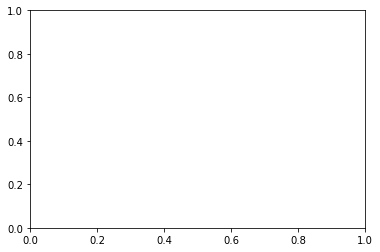

In [93]:
#testing the plotting function with the aviso data set

#opening the dataset
filename = 'dataset-duacs-nrt-global-merged-allsat-phy-l4_1588116812229.nc'
dset = xarray.open_dataset(file)

#selecting day 1 from the adt set
adt = dset['adt']
day_1 = adt[0, :, :]

#test title
t = 'test'

#function call
plot_ncdef_alongtrack(dset, day_1, t)

In [45]:
#ground tracks plot
track_data = dataset['track']
title = 'Ground Tracks for Sentunel-3A'
print(track_data)

#plot_ncdef_alongtrack(dataset, track, title)


<xarray.DataArray 'track' (track number: 72)>
array([ 11.,  26.,  39.,  54.,  67.,  82.,  84.,  95.,  97., 112., 125., 140.,
       153., 168., 181., 196., 198., 209., 211., 226., 239., 254., 267., 282.,
       284., 295., 310., 312., 323., 325., 340., 353., 368., 381., 396., 398.,
       409., 424., 426., 439., 454., 467., 482., 495., 510., 512., 523., 525.,
       538., 540., 553., 568., 581., 596., 609., 624., 626., 637., 639., 652.,
       654., 667., 682., 695., 710., 723., 738., 740., 751., 753., 766., 768.])
Dimensions without coordinates: track number
Attributes:
    units:      track number
    long_name:  Track the measurement belongs to
